In [1]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time
import joblib

________________________________________________________________________________
Sampling DataBase to predict variables with:

'Depth (m)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)' & 'Mod. SBTn (-)'

________________________________________________________________________________

In [2]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_sample.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Combined', 'Combined_weight'], axis = 1)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [25]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_sample.csv')
df_cpt

,Unnamed: 0,Depth (m),qc (MPa),fs (kPa),"σ',v (kPa)",SBT (-),SBTn (-),Mod. SBTn (-),Combined,Combined_weight
0,781963,17.96,1.36,21.2,165.05,4,3,2,"(17.96, 1.36, 21.2, 165.05, 4.0, 3.0, 2.0)",1.270000e-06
1,457822,3.88,4.13,18.8,35.66,6,6,7,"(3.88, 4.13, 18.8, 35.66, 6.0, 6.0, 7.0)",6.370000e-07
2,25268,4.79,0.43,27.0,44.02,3,3,2,"(4.79, 0.43, 27.0, 44.02, 3.0, 3.0, 2.0)",6.370000e-07
3,119641,23.82,15.32,201.2,218.91,6,5,7,"(23.82, 15.32, 201.2, 218.91, 6.0, 5.0, 7.0)",1.270000e-06
4,866788,19.43,28.91,116.4,178.56,7,6,7,"(19.43, 28.91, 116.4, 178.56, 7.0, 6.0, 7.0)",6.370000e-07
...,...,...,...,...,...,...,...,...,...,...
95,2376018,18.04,10.14,58.2,197.18,6,6,7,"(18.04, 10.14, 58.2, 197.18, 6.0, 6.0, 7.0)",6.370000e-07
96,872102,12.98,2.64,45.2,119.29,5,4,4,"(12.98, 2.64, 45.2, 119.29, 5.0, 4.0, 4.0)",6.370000e-07
97,1063098,6.87,4.49,19.7,94.53,6,6,6,"(6.87, 4.49, 19.7, 94.53, 6.0, 6.0, 6.0)",6.370000e-07
98,1638149,33.47,3.75,73.1,307.59,5,3,2,"(33.47, 3.75, 73.1, 307.59, 5.0, 3.0, 2.0)",6.370000e-07


In [3]:
'''
Inputs
'''
X = df_cpt[:, [1, 4, 5, 6, 7]]

#1 --> 'Depth (m)' --> index: 1
#2 --> "σ',v (kPa)" --> index: 4
#3 --> 'SBT (-)' --> index: 5
#4 --> 'SBTn (-)' --> index: 6
#5 --> 'Mod. SBTn (-)' --> index: 7 

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

________________________________________________________________________________
Model
________________________________________________________________________________

In [4]:
# #Load model_06
# model = joblib.load(r'/content/drive/MyDrive/Colab Notebooks/CPT_RF_02_88_06_compress.sav')

In [15]:
#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor( n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 0.01 minutes


________________________________________________________________________________
Predictions
________________________________________________________________________________

In [16]:
#Making a prediction
y_pred_sample = model.predict(X)

In [17]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y, y_pred_sample)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y, y_pred_sample)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y, y_pred_sample)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y[:, 0], y_pred_sample[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y[:, 0], y_pred_sample[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y[:, 0], y_pred_sample[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y[:, 1], y_pred_sample[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y[:, 1], y_pred_sample[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y[:, 1], y_pred_sample[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 15.3795
The mse is: 1229.9049
The rmse is: 35.0700
The R2 is: 0.6933
____________________________________________
Metrics for qc
The mae is: 1.8033 MPa
The mse is: 11.0957 MPa
The rmse is: 35.0700 MPa
The R2 is: 0.6528 MPa
____________________________________________
Metrics for fs
The mae is: 28.9558 kPa
The mse is: 2448.7142 kPa
The rmse is: 35.0700 kPa
The R2 is: 0.7337 kPa


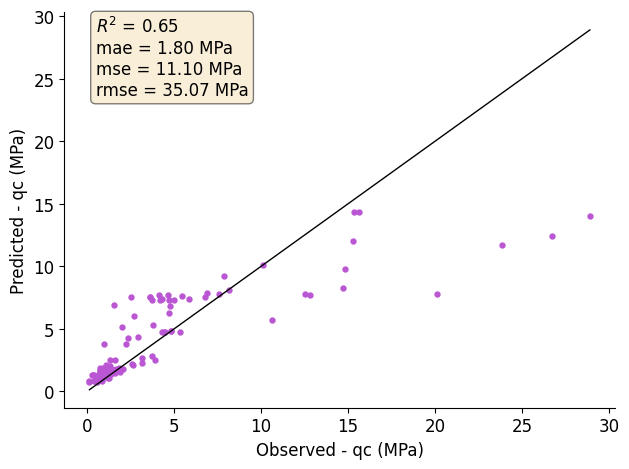

In [20]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_qc), 
                     r'mae = %.2f MPa' % (mae_qc, ),
                     r'mse = %.2f MPa' % (mse_qc, ), 
                     r'rmse = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred_sample[:, 0]), max(y[:, 0]))
p2 = min(min(y_pred_sample[:, 0]), min(y[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 0], y_pred_sample[:, 0], s = 50, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.5, 30, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('Scptu_qc', dpi = 600)

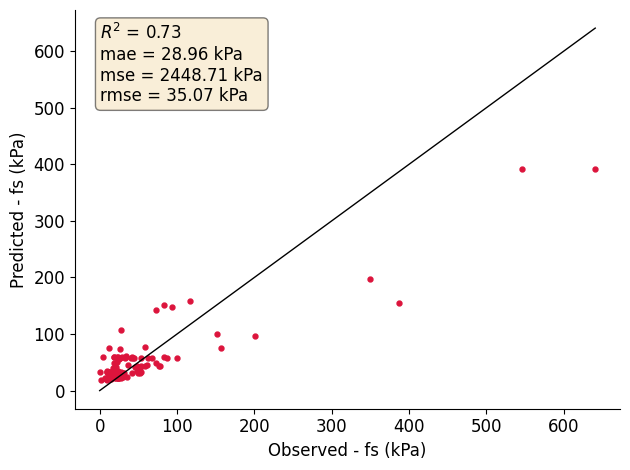

In [23]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_fs), 
                     r'mae = %.2f kPa' % (mae_fs, ),
                     r'mse = %.2f kPa' % (mse_fs, ), 
                     r'rmse = %.2f kPa' % (rmse_fs, )))

p1 = max(max(y_pred_sample[:, 1]), max(y[:, 1]))
p2 = min(min(y_pred_sample[:, 1]), min(y[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 1], y_pred_sample[:, 1], s = 50, c = 'crimson', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 650, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('Scptu_fs', dpi = 600)

________________________________________________________________________________
Quantile Regression
________________________________________________________________________________

In [ ]:
#Each observation has N predictions from the N trees

#Qunatile for Qc
pred_Qc = pd.DataFrame()
for pred in model.estimators_:
    temp = pd.Series(pred.predict(X).round(2)[:,0])
    pred_Qc = pd.concat([pred_Qc,temp],axis=1)
pred_Qc.head()

In [ ]:
#Defining quantile and the function for qc
quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]

RF_actual_pred_qc = pd.DataFrame()

for q in quantiles:
    s = pred_Qc.quantile(q=q, axis=1)
    RF_actual_pred_qc = pd.concat([RF_actual_pred_qc,s],axis=1,sort=False)
   
RF_actual_pred_qc.columns=quantiles
RF_actual_pred_qc['actual'] = y[:,0]
RF_actual_pred_qc['interval'] = RF_actual_pred_qc[np.max(quantiles)] - RF_actual_pred_qc[np.min(quantiles)]
RF_actual_pred_qc = RF_actual_pred_qc.sort_values('interval')
RF_actual_pred_qc = RF_actual_pred_qc.round(2)
RF_actual_pred_qc

In [ ]:
#Function for the intervals

def showIntervals(df):    
    plt.plot(df['actual'],'o',markersize=1,label='Actual')  
    plt.fill_between(
        np.arange(df.shape[0]), df[0.01], df[0.99], alpha=0.7, color="r",
        label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    #plt.xlim([-10, 175000])
    #plt.ylim([-10, 100])
    plt.legend()
    plt.savefig('oredered_qc.png', dpi = 300)
    plt.show()

In [ ]:
#Plot the interval for qc
showIntervals(RF_actual_pred_qc)

In [ ]:
#Function to avalueate the % of points in the interval of prediction
def correctPcnt(df):
    correct = 0
    obs = df.shape[0]
    for i in range(obs):
        if df.loc[i,0.01] <= df.loc[i,'actual'] <= df.loc[i,0.99]:
            correct += 1
    print(correct/obs)

In [ ]:
#Values in the interval of predictions for qc  
correctPcnt(RF_actual_pred_qc)